# Analyse de données : Projet informatique

In [2]:
import pandas as pd
from pathlib import Path
import sys

sys.path.append("../")
from utils import read_data

In [3]:
# Main Path
DATA_PATH = Path("../data/cars24data.csv")

df = read_data(DATA_PATH)
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


# Analyse pour le modèle ER

In [4]:
# 1) On veux une table décrivant les modèles
print(df[["Model Name"]].drop_duplicates().shape)
print(
    df[
        [
            "Model Name",
            "Manufacturing_year",
            "Engine capacity",
            "Fuel type",
            "Transmission",
        ]
    ]
    .drop_duplicates()
    .shape
)

(573, 1)
(584, 5)


In [5]:
# Ici, on a des dupliqués (différence de taille). Essayons de comprendre quelle colonne(s) provoque(nt) ce phénomène
for col in ("Manufacturing_year", "Engine capacity", "Fuel type", "Transmission"):
    print(col, " -->", df[["Model Name", col]].drop_duplicates().shape)

Manufacturing_year  --> (573, 2)
Engine capacity  --> (574, 2)
Fuel type  --> (583, 2)
Transmission  --> (573, 2)


In [6]:
# On a 573 noms de modèles différents, ici, on remarque que pour un modèle,
# - L'année et la transmission sont toujours les mêmes
# - Les caractéristiques du moteur peuvent changer
# Ex:
df[["Model Name", "Engine capacity", "Fuel type"]].drop_duplicates().sort_values(
    by="Model Name"
)

,Model Name,Engine capacity,Fuel type
1126,2010 Maruti A Star LXI,998,Petrol
44,2011 Maruti Alto K10 VXI,998,Petrol
814,2011 Maruti Ritz LXI,1197,Petrol
1082,2011 Maruti Ritz VDI,1248,Diesel
784,2011 Maruti Ritz VXI,1197,Petrol
...,...,...,...
919,2023 Maruti S PRESSO VXI+,998,Petrol
878,2023 Maruti Swift LXI,1197,Petrol
828,2023 Maruti Swift VXI,1197,Petrol
245,2023 Maruti XL6 ALPHA PLUS MT,1462,Petrol


In [7]:
# Verifions rapidement le nombre de possibilités pour mon couple moteur (Capacité + type d'essence).
# Peut être que les caractéristiques moteurs peuvent constituer une table à part entière.
df[["Engine capacity", "Fuel type"]].drop_duplicates()

,Engine capacity,Fuel type
0,1197,Petrol
3,1462,Petrol
5,796,Petrol
9,998,Petrol
34,1248,Diesel
53,1248,Petrol
75,998,CNG
112,1373,Petrol
243,1462,CNG
265,796,CNG


In [8]:
# Bingo, on a que 10 moteurs différents !!!!!

In [9]:
mermaid_diagramm = """
```mermaid
erDiagram

    ENGINE {
        string id_engine PK
        string fuel_type
        string capacity
    }

    TRANSMISSION {
        string id_transmission PK
        string transmission
    }

    MODEL {
        string id_model PK
        string name
        string id_engine FK
        string id_transmission FK
    }

    CUSTOMER {
        string id_customer PK
        string first_name
        string last_name
        EmailStr email
        string rating
    }

    TRANSACTION {
        string id_transaction PK
        string id_customer FK
        string id_model FK
        float price
        float km_driven
        bool spare_key
        int ownership
        int imperfections
        int repainted_parts
    }

    MODEL ||--|| ENGINE : "has"
    MODEL ||--|| TRANSMISSION : "has"
    TRANSACTION ||--|| CUSTOMER : "belongs to"
    TRANSACTION ||--|| MODEL : "refers to"

```
"""

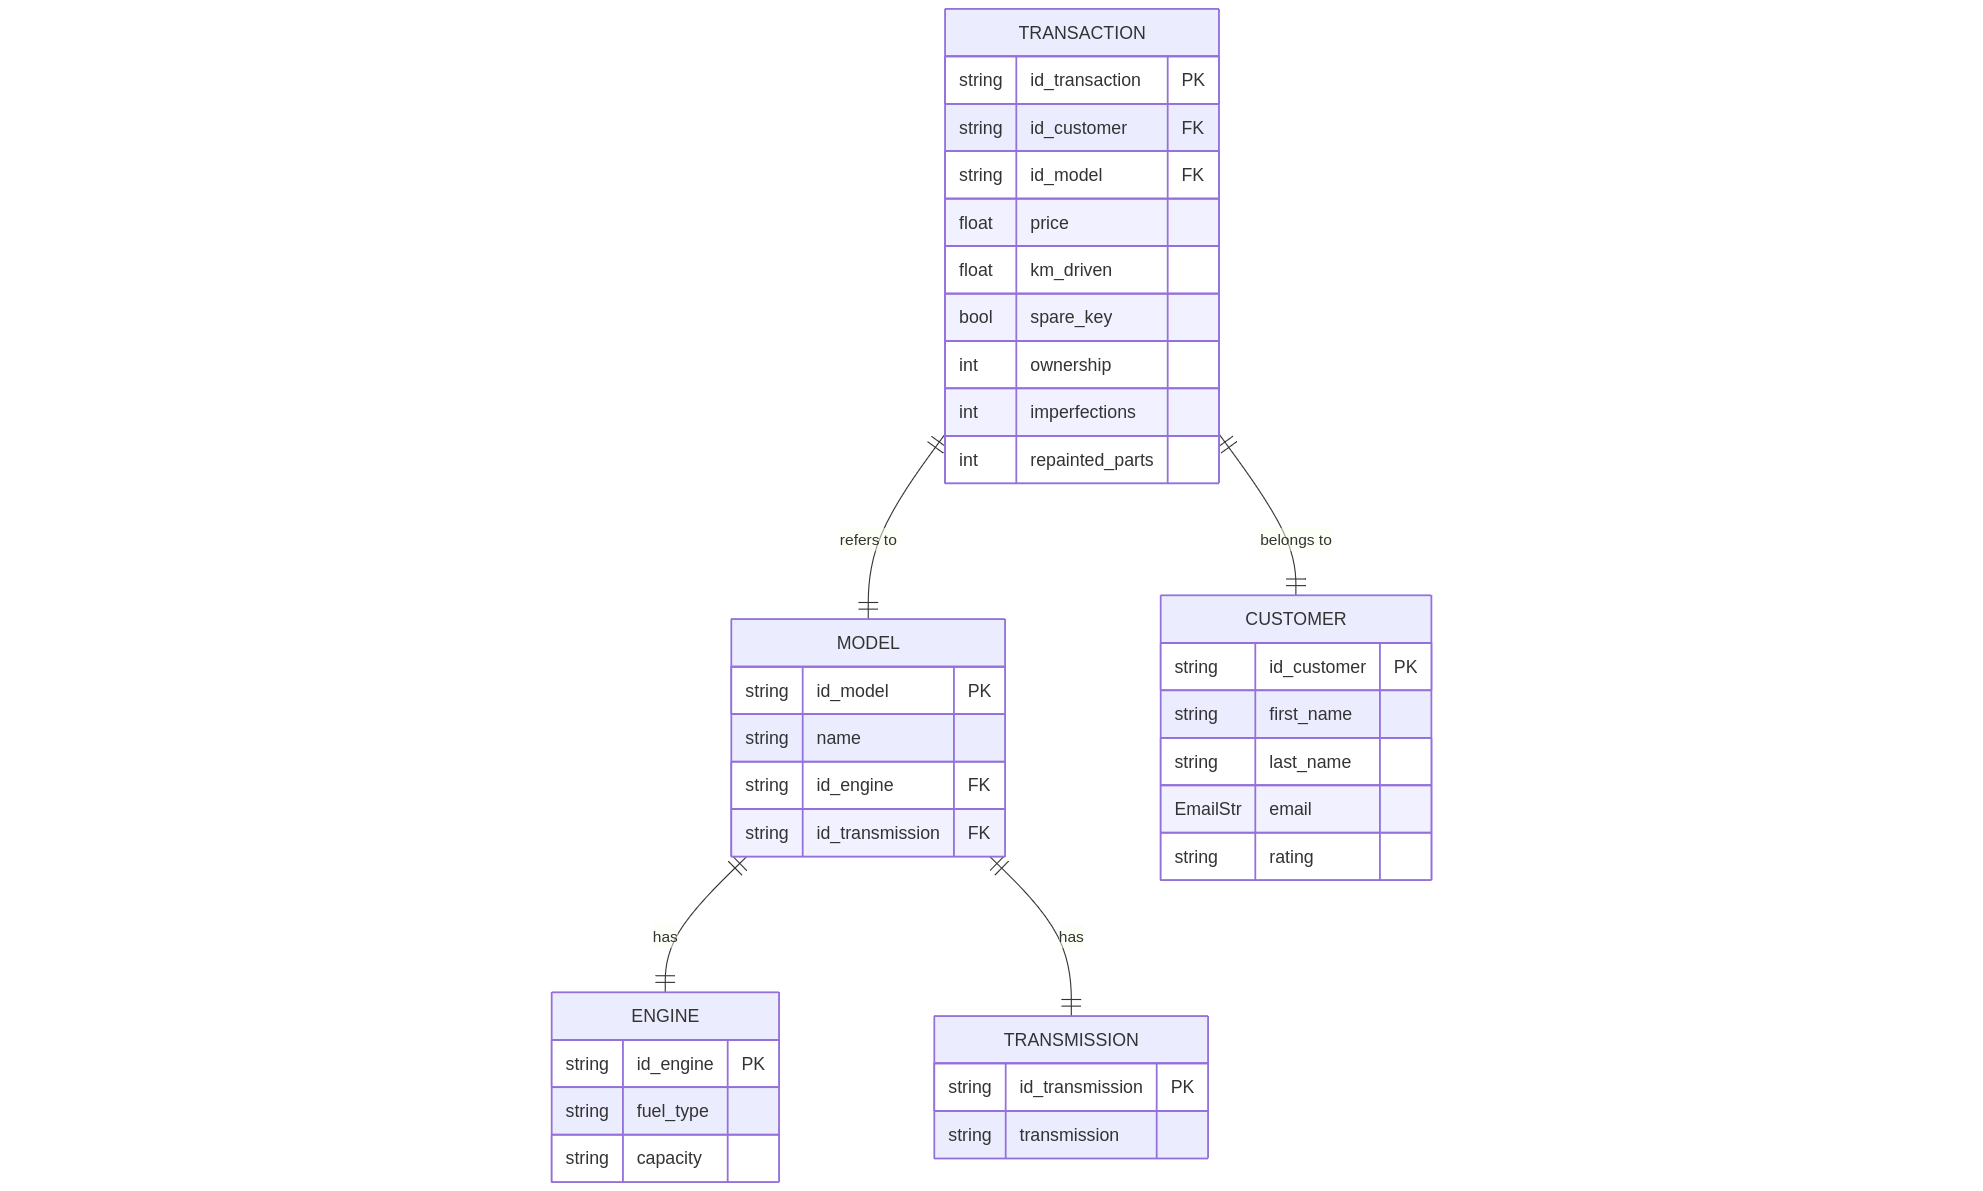

In [12]:
from IPython import display

display.Image("../images/er_diagram.png")